In [21]:
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pkl_file = open('df.pkl', 'rb')
df = pickle.load(pkl_file)
pkl_file.close() 

In [3]:
features = ['top_elev_(ft)', 
            'bottom_elev_(ft)', 
            'vert_rise_(ft)', 
            'slope_length_(ft)', 
            'avg_width_(ft)', 
            'slope_area_(acres)', 
            'avg_grade_(%)', 
            'max_grade_(%)', 
            'groomed']

X = df[features].values

In [35]:
X
ss = StandardScaler()
X = ss.fit_transform(X)

In [36]:
km = KMeans(n_clusters=4)

In [45]:
km_labels = km.fit_predict(X)

In [38]:
gm = GaussianMixture(n_components=4)

In [39]:
gmm = gm.fit(X)

In [42]:
gm_labels = gmm.predict(X)

In [48]:
km_labels, gm_labels

(array([1, 1, 1, ..., 0, 0, 0], dtype=int32), array([3, 3, 3, ..., 0, 0, 0]))

In [54]:
np.where(km_labels == 1)[0].shape

(399,)

In [53]:
np.where(gm_labels == 3)[0].shape

(625,)

In [19]:
def plot_iterations(iterations, data, plotname = None):
    '''
    iterations is a list, data is a np array
    '''
    fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(8,6))
    ax = ax.flatten()

    init_points = data[:3]
    for j, it in enumerate(iterations):
        km = KMeans(n_clusters=3, n_init=1, max_iter=it, \
                    random_state=0, n_jobs=-1)
        km.fit(data)
        cents = km.cluster_centers_
        labels = km.labels_
        ax[j].scatter(data[:,0], data[:,1], s=10, c= labels, cmap = 'cool', alpha = 0.6)
        ax[j].scatter(cents[:,0], cents[:,1], s=50, c= 'k', label = 'centroids')
        ax[j].set_title('{} iterations'.format(it))

    plt.tight_layout()
    if plotname:
        plt.savefig(plotname)
    else:
        plt.show()

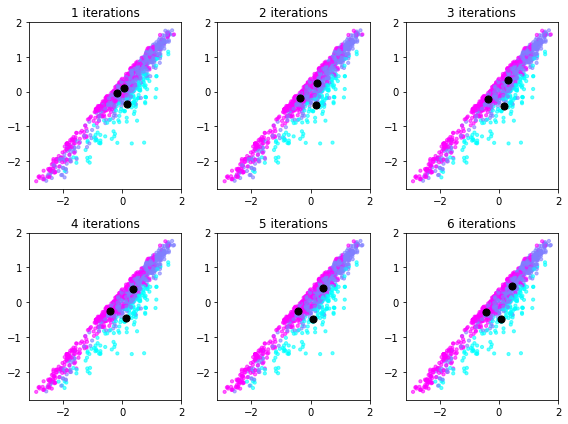

In [20]:
plot_iterations(range(1,7),X)